In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [31]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [32]:
df.shape

(200, 6)

In [33]:
X = df.drop(['Drug'], axis = 1)
X[0:3]

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114


In [34]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

In [36]:
X.loc[:,'sex enc'] = label.fit_transform(X.iloc[:,1])
X.loc[:,'bp enc'] = label.fit_transform(X.iloc[:,2])
X.loc[:,'cholesterol enc'] = label.fit_transform(X.iloc[:,3])

In [37]:
X[:3]

,Age,Sex,BP,Cholesterol,Na_to_K,sex enc,bp enc,cholesterol enc
0,23,F,HIGH,HIGH,25.355,0,0,0
1,47,M,LOW,HIGH,13.093,1,1,0
2,47,M,LOW,HIGH,10.114,1,1,0


In [39]:
X[['Cholesterol', 'cholesterol enc']].drop_duplicates()

,Cholesterol,cholesterol enc
0,HIGH,0
9,NORMAL,1


In [40]:
X[['BP', 'bp enc']].drop_duplicates()

,BP,bp enc
0,HIGH,0
1,LOW,1
3,NORMAL,2


In [41]:
X[['Sex', 'sex enc']].drop_duplicates()

,Sex,sex enc
0,F,0
1,M,1


### Decision Tree Build

In [42]:
X.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'sex enc', 'bp enc',
       'cholesterol enc'],
      dtype='object')

In [43]:
x = X[['Age', 'Na_to_K', 'sex enc', 'bp enc',
       'cholesterol enc']]

In [44]:
y = df['Drug']

In [45]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

Shape of X training set (160, 5) &  Size of Y training set (160,)
Shape of X training set (40, 5) &  Size of Y training set (40,)


In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [49]:
predTree = model.predict(X_testset)

In [50]:
print (predTree [0:5])
print (y_testset [0:5])


['drugX' 'drugY' 'drugX' 'drugC' 'drugY']
95     drugX
15     drugY
30     drugX
158    drugC
128    drugY
Name: Drug, dtype: object


In [51]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


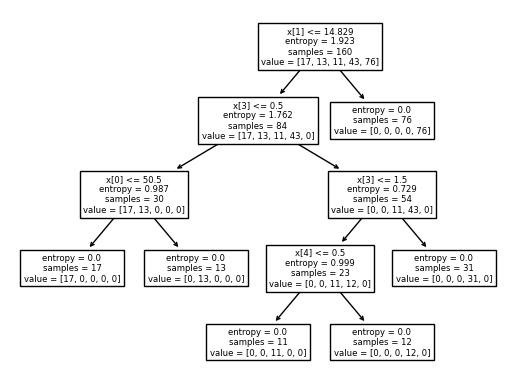

In [54]:
import sklearn.tree as tree

tree.plot_tree(model)
plt.show()